In [4]:
import pandas as pd
import numpy as np
import sys
import os

import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "simple_white"
from plotly.subplots import make_subplots

import fig_utils

import load_datasets

In [5]:
base_dir = os.path.join('sl_results','23Aug22','1')
bulk_dir = os.path.join('sl_results','28Aug22','1')
sfai_dir = os.path.join('sl_results','28Aug22','1')

# plot type = '' (main text), _bulk, _sfai
plot_types = ['', '_bulk', '_sfai']

fs = []

for pt in plot_types:

    if pt == '':
        path_zt = os.path.join(base_dir,'starrydata_zt','starrydata_zt-1-496-55-90-100.csv')
        path_tc = os.path.join(base_dir,'starrydata_tc','starrydata_tc-1-496-55-0-10.csv')
        path_sigma = os.path.join(base_dir,'starrydata_sigma','starrydata_sigma-1-559-62-90-100.csv')
        
    if pt == '_bulk':
        path_zt = os.path.join(bulk_dir,'starrydata_zt_bulk','starrydata_zt_bulk-1-218-24-90-100.csv')
        path_tc = os.path.join(bulk_dir,'starrydata_tc_bulk','starrydata_tc_bulk-1-211-23-0-10.csv')
        path_sigma = os.path.join(bulk_dir,'starrydata_sigma_bulk','starrydata_sigma_bulk-1-234-26-90-100.csv')

    if pt == '_sfai':
        path_zt = os.path.join(sfai_dir,'starrydata_zt_sfai','starrydata_zt_sfai-1-524-58-90-100.csv')
        path_tc = os.path.join(sfai_dir,'starrydata_tc_sfai','starrydata_tc_sfai-1-518-57-0-10.csv')
        path_sigma = os.path.join(sfai_dir,'starrydata_sigma_sfai','starrydata_sigma_sfai-1-587-65-90-100.csv')

        
    fs.extend([path_zt, path_tc, path_sigma])
    
print(fs)

['sl_results/23Aug22/1/starrydata_zt/starrydata_zt-1-496-55-90-100.csv', 'sl_results/23Aug22/1/starrydata_tc/starrydata_tc-1-496-55-0-10.csv', 'sl_results/23Aug22/1/starrydata_sigma/starrydata_sigma-1-559-62-90-100.csv', 'sl_results/28Aug22/1/starrydata_zt_bulk/starrydata_zt_bulk-1-218-24-90-100.csv', 'sl_results/28Aug22/1/starrydata_tc_bulk/starrydata_tc_bulk-1-211-23-0-10.csv', 'sl_results/28Aug22/1/starrydata_sigma_bulk/starrydata_sigma_bulk-1-234-26-90-100.csv', 'sl_results/28Aug22/1/starrydata_zt_sfai/starrydata_zt_sfai-1-524-58-90-100.csv', 'sl_results/28Aug22/1/starrydata_tc_sfai/starrydata_tc_sfai-1-518-57-0-10.csv', 'sl_results/28Aug22/1/starrydata_sigma_sfai/starrydata_sigma_sfai-1-587-65-90-100.csv']


This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]

File:  sl_results/23Aug22/1/starrydata_zt/starrydata_zt-1-496-55-90-100.csv
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
File:  sl_results/23Aug22/1/starrydata_tc/starrydata_tc-1-496-55-0-10.csv
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arr

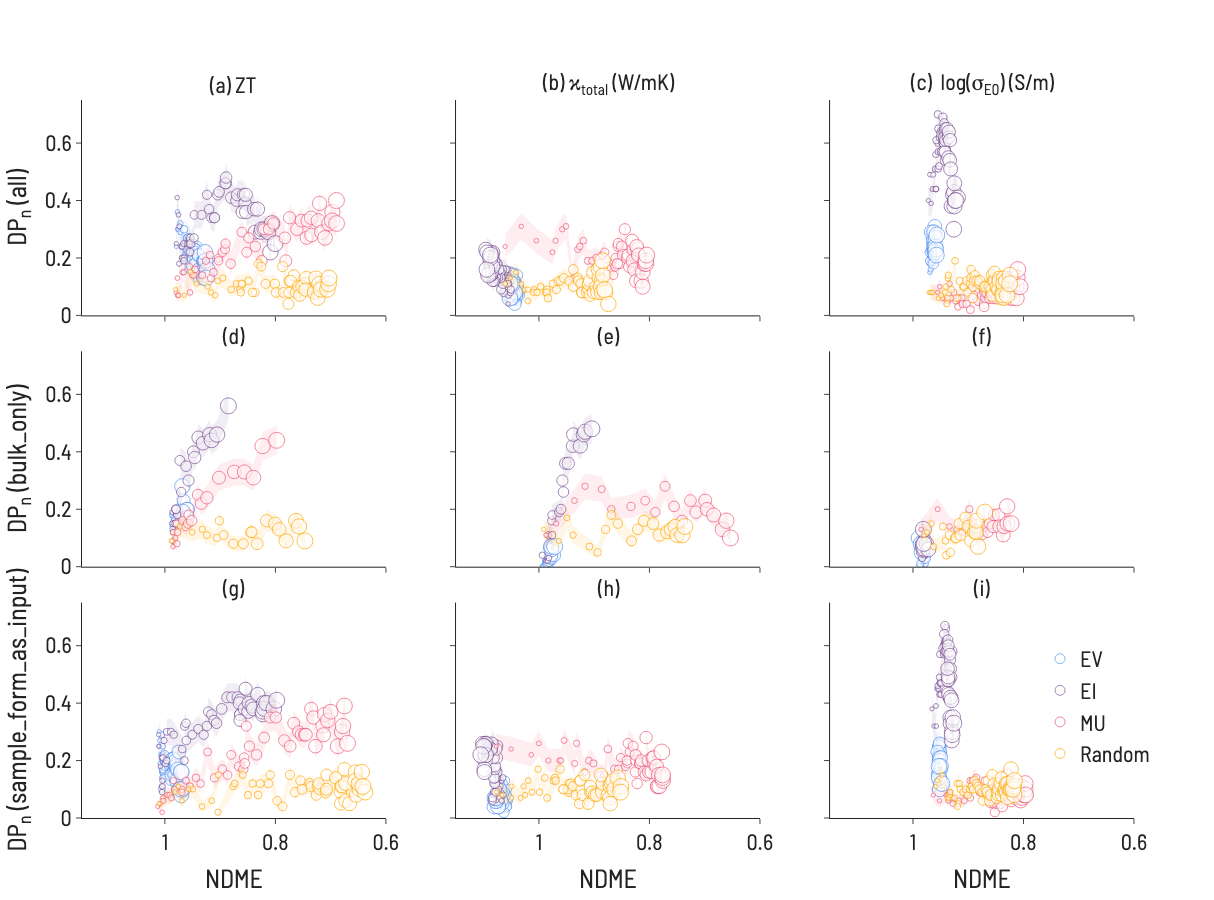

In [8]:
fig = make_subplots(
    rows=3, cols=3,
#     specs=[[{}, {'rowspan':2}],
#            [{}, None]],
    print_grid=True,
    shared_yaxes=True,
    shared_xaxes=True, 
    vertical_spacing=0.05,
    subplot_titles=['(a) ZT', '(b) &#954;<sub>total</sub> (W/mK)', '(c)  log(&#963;<sub>E0</sub>) (S/m)',
                   '(d)', '(e)', '(f)',
                    '(g)', '(h)', '(i)',
                   ]
)

for f in fs:
    
    if 'zt' in f and 'bulk' not in f and 'sfai' not in f:
        traces = fig_utils.get_discovery_probability_traces([f], x_metric='NDME', legend=True)
    else:
        traces = fig_utils.get_discovery_probability_traces([f], x_metric='NDME', legend=False)

    
    if 'zt' in f:
        col = 1
    if 'tc' in f:
        col = 2
    if 'sigma' in f:
        col = 3
        
    if '' in f:
        row = 1
    if 'bulk' in f:
        row = 2
    if 'sfai' in f:
        row = 3
        
        
    for ft in traces:
        fig.add_trace(ft, row=row, col=col)
        fig.update_xaxes(range=[1.15, 0.6], row=row, col=col)
        fig.update_yaxes(range=[0, 0.75], row=row, col=col)

fig.update_xaxes(title_text='NDME', row=3, col=1)
fig.update_xaxes(title_text='NDME', row=3, col=2)        
fig.update_xaxes(title_text='NDME', row=3, col=3)
fig.update_yaxes(title_text='DP<sub>n</sub> (all)', row=1, col=1)
fig.update_yaxes(title_text='DP<sub>n</sub> (bulk_only)', row=2, col=1)
fig.update_yaxes(title_text='DP<sub>n</sub> (sample_form_as_input)', row=3, col=1)

fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.06,
    xanchor="right",
    x=1.02
))
fig.layout.legend.tracegroupgap = 0

fig.update_annotations(font=dict(family="Barlow Semi Condensed", size=22))
fig.update_layout(font=dict(family="Barlow Semi Condensed", size=22), width=1000, height=900,  showlegend=True)
fig.write_image(os.path.join("static","fig7-sl_compare-starrydata.png"), scale=2)
fig.show()